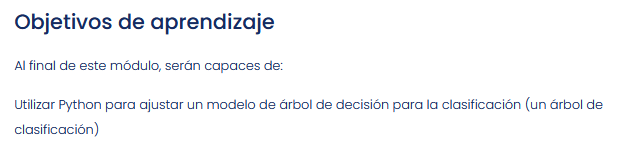

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.

NameError: ignored

In [2]:
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7xKRXls5R2Mc3P33TuScxTZLkDnAC0S6_LpHaincErqVk5_AsPZ-NzvF4EDz62IjF86FLfnj4-Iz2/pub?gid=198577759&single=true&output=csv'
df = pd.read_csv(path)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Encuentren los nombres de clase y determinen como estan las clases balanceadas

In [5]:
# al usar normalize = True con value_counts, nuestra salida es el porcentaje de cada clase (escrito como decimal)
df['Species'].value_counts(normalize = True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

Podemos observar desde la salida anterior que nuestros conjuntos de datos tienen tres clases de especies de iris: iris-setosa, iris-virginica, iris-versicolor. Tambien podemos ver que nuestro conjunto de datos esta perfectamente balanceado. 

esto es bastante inusual pero este conjunto de datos se utiliza especificamente con fines de formacion.

**Conviertan los nombres de cadenas de las clases para valores numericos**

Asignaremos iris_setosa =0, iris-virginica=1 e iris-versicolor = 2

In [16]:
df["Species"] = df["Species"].replace({"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2})

Los siguientes pasos en este proceso son muy similares a los pasos que se usan en nuestro arbol de decision para la regresion

**Ordenen los datos en matriz de caracteristicas y vector objetivo**

In [17]:
y =df["Species"]

X =df.drop(columns="Species")

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

**Clasificador del arbol de decision**

1. Importar el modelo que quieran usar

En sklearn, todos los modelos de aprendizaje automatico se implementan como clases de Python.

In [9]:
from sklearn.tree import DecisionTreeClassifier

2. Hacer una instancia del modelo

Aqui es donde podemos afinar los hiperparametros del modelo. El codigo de abajo restringe el modelo par aque tenga como maximo una profundidad de 2. La profundidad del arbol es una medida de cuantas divisiones hace antes de llegar a una prediccion. estos son los casos donde max_depth no es igual a depth.


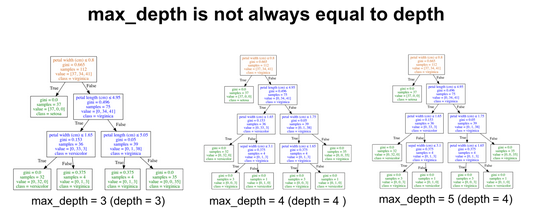

In [18]:
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=2)

In [19]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

3. Entrenar el modelo en los datos, almacenando la informacion aprendida.

El modelo esta aprendiendo la relacion entre X (caracteristicas de anchura de los sepalos, altura de los sepalos) e y( etiquetas, que especies de iris)

In [20]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

4. Predecir las etiquetas de los datos nuevos (nuevas flores)

In [21]:
dec_tree.predict(X_test)

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

5. Evaluar rendimiento del modelo

In [22]:
# calculen la exactitud de la clasificación
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)


0.9464285714285714
0.9736842105263158
